In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [37]:
# db = pd.read_csv('diabetes_prediction_dbset.csv')
db = pd.read_csv(
    'C:\\Users\\Lenovo\\Desktop\\college1\\Labs\\semester 5\\Machine Learning\\2101227_Lab_3\\diabetes_prediction_dataset.csv')
db.head()

scaler=MinMaxScaler()
col_to_scale = ['bmi', 'age', 'HbA1c_level', 'blood_glucose_level']
db[col_to_scale] = scaler.fit_transform(db[col_to_scale])


In [38]:
gender={'Female':0,'Male':1,'Other':2}
smoke={'never':0,'No Info':1,'current':2,'former':3,'ever':4,'not current':5}
db['gender'] = db['gender'].map(gender)
db['smoking_history'] = db['smoking_history'].map(smoke)

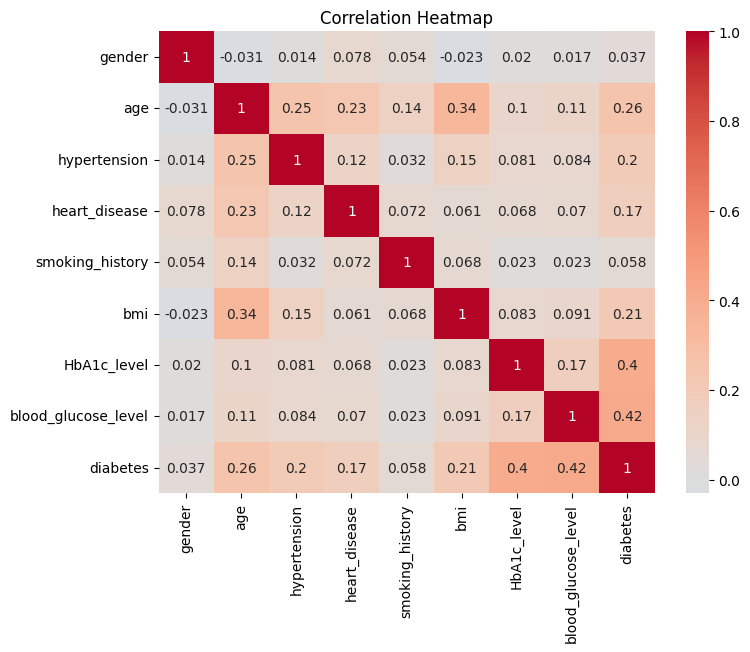

In [39]:

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = db.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create the correlation heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

# Show the plot
plt.title('Correlation Heatmap')
plt.show()


In [40]:
# Features excluding the 'diabetes' column
x = db.drop(['diabetes', 'smoking_history', 'gender'], axis=1)
y = db['diabetes']  # Target column

In [41]:
# Split the db into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)
db['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [42]:
print(f"xtest :\n {x_test}")
print(f"xtrain :\n {x_train}")
print(f"ytest :\n {y_test}")
print(f"train :\n {y_train}")
x.sample(7)



xtest :
             age  hypertension  heart_disease       bmi  HbA1c_level   
22422  0.186687             0              0  0.220005     0.090909  \
25747  0.024024             0              0  0.072012     0.272727   
13795  1.000000             0              0  0.202031     0.090909   
68724  0.249249             0              0  0.162232     0.236364   
38923  0.612112             0              0  0.202031     0.236364   
...         ...           ...            ...       ...          ...   
15656  0.949950             1              0  0.206699     0.454545   
88084  0.249249             0              0  0.202031     0.236364   
52924  0.336837             0              0  0.491480     0.563636   
87959  0.799800             0              0  0.274860     0.236364   
11767  0.499499             0              0  0.242297     0.400000   

       blood_glucose_level  
22422             0.000000  
25747             0.209091  
13795             0.545455  
68724             0.00

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
35217,0.699700,0,0,0.192344,0.090909,0.045455
71560,0.018519,0,0,0.128501,0.545455,0.000000
31199,0.524525,1,0,0.283263,0.400000,0.000000
34509,0.524525,0,0,0.248483,0.454545,0.354545
63256,0.474474,0,0,0.202031,0.563636,0.354545
86365,0.662162,1,0,0.202031,0.000000,0.209091
5704,0.974975,0,0,0.170285,0.472727,0.000000


In [43]:
class LogisticRegression:
    def __init__(self, learning_rate, n_iters):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = 0.1*np.ones(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            # apply sigmoid function
            y_predicted = self._sigmoid(linear_model)

            # compute gradients
            # derivative w.r.t weights
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            
            # derivative w.r.t bias
            db = (1 / n_samples) * np.sum(y_predicted - y)
            
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))


def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [44]:
itr = []
acc = []
regressor = LogisticRegression(learning_rate=0.075, n_iters=5000)
regressor.fit(x_train, y_train)
predictions = regressor.predict(x_test)
itr.append(1000)
print("LR classification accuracy:", accuracy(y_test, predictions))
acc.append(accuracy(y_test, predictions))

LR classification accuracy: 0.9416


In [45]:
regressor.weights

array([1.30049491, 0.97800182, 0.93440662, 0.2207456 , 3.23956567,
       3.33160559])

In [46]:
regressor.bias

-5.747910747167581

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     18327
           1       0.95      0.32      0.48      1673

    accuracy                           0.94     20000
   macro avg       0.95      0.66      0.72     20000
weighted avg       0.94      0.94      0.93     20000

